In [ ]:
# Assuming, true parameter value
y <- rnorm(10,1,2)

In [ ]:
# Observed Data
y

[1]  1.94955031  3.71205684  2.43633501 -0.09507010  1.63744155  0.07886438
 [7]  0.90410894  1.87152595  1.55527158  2.54349798

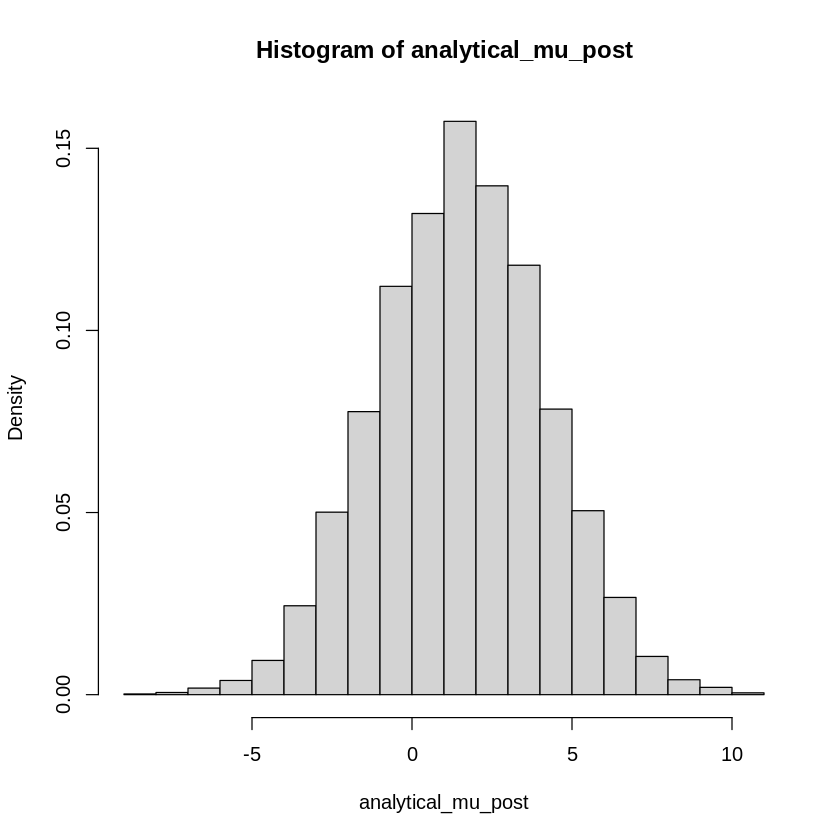

In [ ]:
######################
# Analytical posterior
######################

sigma = 2 # Known standard devation of normal distribution
mu_prior = 0 # Mean of prior distribution on mu
sigma_prior = 3 # Standard deviation of prior distribution on mu
n = 10 # no. of observations
analytical_mu_post <- rnorm(10000,
mean=(((sigma^2)*(mu_prior))+
((sigma_prior^2)*sum(y)))/
(sigma^2 + (n*(sigma_prior^2))),
sd=(1/(sigma_prior^2))+(n/(sigma^2)))
hist(analytical_mu_post,freq = FALSE)

In [ ]:
########################
# Grid approximation
########################

In [ ]:
# Set up a sequence of grid points for mu
mu_grid <- seq(-10, 10, length=1000)

In [ ]:
# Initialize a dataframe to store mu, likelihood, prior, and posterior
df.posterior <- data.frame(matrix(ncol=3, nrow=length(mu_grid)))
colnames(df.posterior) <- c("mu", "likelihood", "prior")


In [ ]:
# Loop over each grid point to calculate the likelihood and prior
for(i in 1:length(mu_grid)) {
    # Calculate the likelihood at the ith grid point
    likelihood <- prod(dnorm(y, mu_grid[i], 2))

    # Calculate the prior at the ith grid point
    prior <- dnorm(mu_grid[i], 0, 3)

    # Store the mu, likelihood, and prior values in the dataframe
    df.posterior[i, ] <- c(mu_grid[i], likelihood, prior)
}

In [ ]:
# Approximate the marginal likelihood (ML) by summing over all grid points
ML <- sum(df.posterior$likelihood * df.posterior$prior)

In [ ]:
# Initialize a column for the posterior
df.posterior$posterior <- numeric(length(mu_grid))

In [ ]:
# Calculate the posterior density at each grid point
for(i in 1:length(mu_grid)) {
    df.posterior$posterior[i] <- df.posterior$likelihood[i] * df.posterior$prior[i] / ML
}

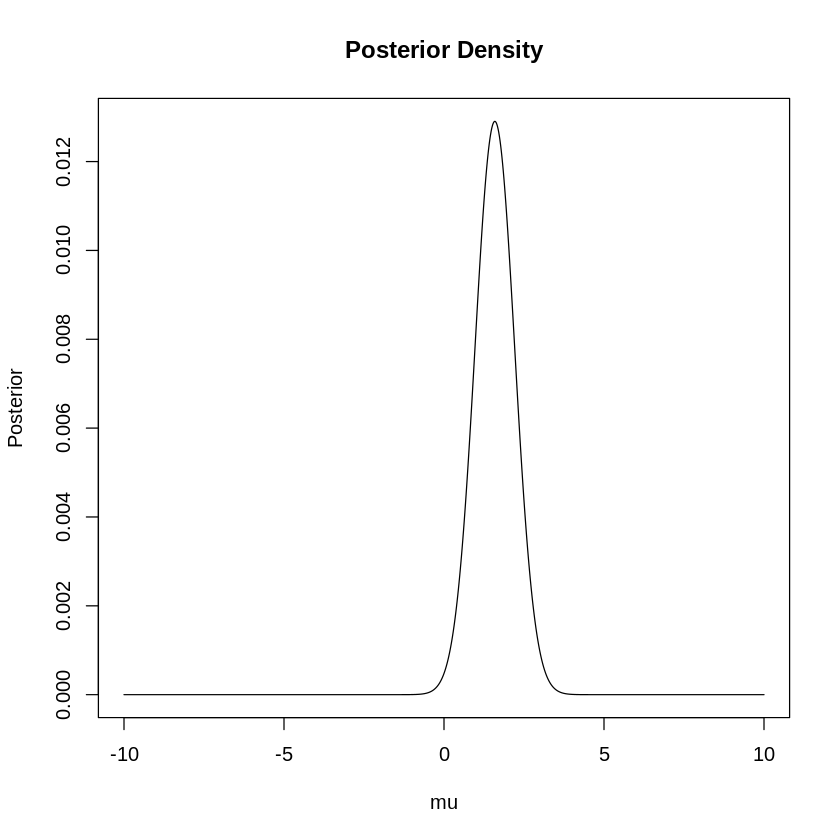

In [ ]:
# Plot the posterior density against mu
plot(df.posterior$mu, df.posterior$posterior, type="l",
     main="Posterior Density", xlab="mu", ylab="Posterior")